In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder                                                                           
from sklearn.cluster import KMeans , DBSCAN
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("../data/CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [29]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
data["MINIMUM_PAYMENTS"]= data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(), inplace=False)

In [31]:
data.isnull().sum() 

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [32]:
data["CREDIT_LIMIT"] = data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(), inplace=False)

In [33]:
data.isnull().sum() 

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [34]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [35]:
normalisationColumns = ['BALANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']

In [36]:
data[normalisationColumns] =StandardScaler().fit_transform(data[normalisationColumns])
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-0.731989,0.818182,-0.424900,-0.356934,-0.349079,-0.466786,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,0.000000,12
1,C10002,0.786961,0.909091,-0.469552,-0.356934,-0.454576,2.605605,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.688639,0.818642,0.089310,0.222222,12
2,C10003,0.447135,1.000000,-0.107668,0.108889,-0.454576,-0.466786,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,0.000000,12
3,C10004,0.049099,0.636364,0.232058,0.546189,-0.454576,-0.368653,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.826062,-0.598688,0.000000,0.000000,12
4,C10005,-0.358775,1.000000,-0.462063,-0.347294,-0.454576,-0.466786,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,0.000000,12


In [37]:
# data["TENURE"] = MinMaxScaler().fit_transform(data["TENURE"])   

x = data["TENURE"].to_frame()
data["TENURE"] = MinMaxScaler().fit_transform(x)    
data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-0.731989,0.818182,-0.424900,-0.356934,-0.349079,-0.466786,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,0.000000,1.0
1,C10002,0.786961,0.909091,-0.469552,-0.356934,-0.454576,2.605605,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.688639,0.818642,0.089310,0.222222,1.0
2,C10003,0.447135,1.000000,-0.107668,0.108889,-0.454576,-0.466786,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,0.000000,1.0
3,C10004,0.049099,0.636364,0.232058,0.546189,-0.454576,-0.368653,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.826062,-0.598688,0.000000,0.000000,1.0
4,C10005,-0.358775,1.000000,-0.462063,-0.347294,-0.454576,-0.466786,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,0.000000,1.0


In [38]:
data.drop(columns=["CUST_ID"], inplace=True )

In [39]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,0.818182,-0.424900,-0.356934,-0.349079,-0.466786,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,0.000000,1.0
1,0.786961,0.909091,-0.469552,-0.356934,-0.454576,2.605605,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.688639,0.818642,0.089310,0.222222,1.0
2,0.447135,1.000000,-0.107668,0.108889,-0.454576,-0.466786,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,0.000000,1.0
3,0.049099,0.636364,0.232058,0.546189,-0.454576,-0.368653,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.826062,-0.598688,0.000000,0.000000,1.0
4,-0.358775,1.000000,-0.462063,-0.347294,-0.454576,-0.466786,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,0.000000,1.0


In [40]:
inerta= []  
for i in range (1,10) :
  k_means = KMeans(n_clusters=i)
  k_means.fit_transform(data)
  distance = k_means.inertia_
  inerta.append(distance) 

inerta

[95223.3246163906,
 76918.69668732242,
 64211.12589719708,
 56865.03471551318,
 52166.837136953036,
 48497.04229518123,
 46482.1898981706,
 41936.59108612645,
 39867.05572717954]

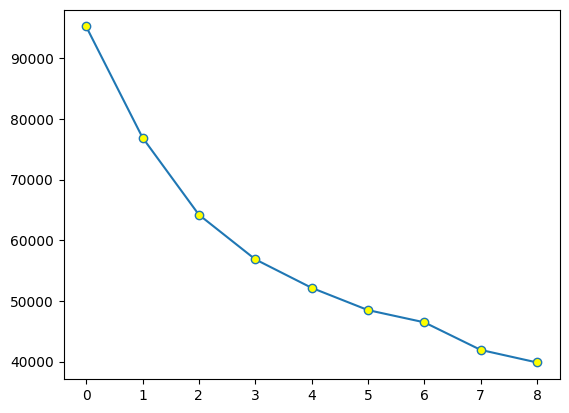

In [ ]:
plt.plot(inerta, marker='o', markerfacecolor='yellow')

In [ ]:
k_means = KMeans(n_clusters=4)
k_means.fit_transform(data)


array([[ 4.12384505,  4.64491138,  1.04343376, 14.9647684 ],
       [ 4.64583438,  2.07449951,  3.52235606, 14.36749499],
       [ 2.97479869,  3.7731114 ,  1.87199985, 13.94424755],
       ...,
       [ 4.04058223,  4.80328606,  1.41710657, 14.90207007],
       [ 4.44218138,  4.70748631,  1.52355297, 15.15061719],
       [ 3.49271293,  4.59834621,  1.62987506, 14.16252493]],
      shape=(8950, 4))

In [60]:
labels = k_means.labels_
labels

array([2, 1, 2, ..., 2, 2, 2], shape=(8950,), dtype=int32)